In [54]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [55]:
data = pd.read_excel('19MayUV.xlsx')
print("Read the source excel")

Read the source excel


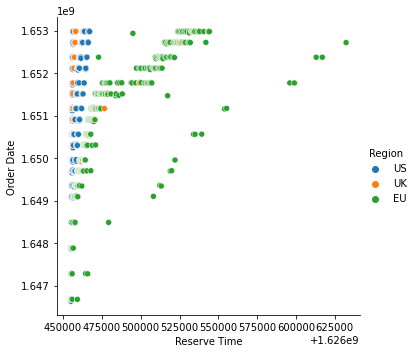

In [56]:
import seaborn as sns

sns.relplot(x="Reserve Time", y="Order Date", hue="Region", data=data)

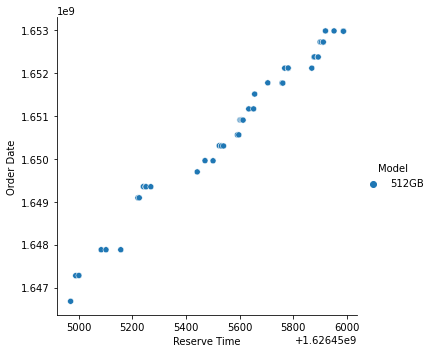

In [57]:
import seaborn as sns

data_t = data[(data['Region'] == 'UK') & (data['Model'] == '512GB') ]


sns.relplot(x="Reserve Time", y="Order Date", hue="Model", data=data_t)

In [47]:
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

In [48]:
fil = data[(data['Region'] == 'US') & (data['Model'] == '64GB') ]
data = fil

In [49]:
y = data.iloc[:, -1]

X = data.iloc[:, 2:3]

In [50]:
#Do a test train split
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7, test_size=0.3,
                                                      random_state=1)
print("Test Train Split")

Test Train Split


In [51]:
#use linear regression to train the model and score the accuracy of the model
model = LinearRegression().fit(X_train, y_train)
r_sq = model.score(X_valid, y_valid)
print(r_sq * 100)

95.15594606992236


In [52]:
#Region	Model	Timestamp	ValveEstimate
d = [{"Reserve Time": 1626456608},
     {"Reserve Time": 1626460469},
     {"Reserve Time": 1626463441},
     {"Reserve Time": 1626464460},
     {"Reserve Time": 1626469138}]
df = pd.DataFrame(data=d)
import datetime 
res  = model.predict(df)
print(res)
for t in res:
    print("{0:.0f}".format(t))
    date_time = datetime.datetime.fromtimestamp( t)
    print(date_time)

 




[1.64918451e+09 1.65070480e+09 1.65187504e+09 1.65227628e+09
 1.65411827e+09]
1649184511
2022-04-05 21:48:30.534546
1650704802
2022-04-23 12:06:41.674927
1651875044
2022-05-07 01:10:43.909912
1652276281
2022-05-11 16:38:01.069214
1654118271
2022-06-02 00:17:50.697632


In [31]:
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline

my_pipeline = XGBRegressor()

my_pipeline.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [13]:
r_sq = my_pipeline.score(X_valid, y_valid.values.ravel())
print(r_sq * 100)

98.10834938616142


In [14]:
from sklearn.metrics import mean_absolute_error

preds = my_pipeline.predict(X_valid)
print(mean_absolute_error(y_valid, preds))

57262.875


In [15]:
#Region	Model	Timestamp	ValveEstimate

res  = my_pipeline.predict(df[3:4])
print("{0:.0f}".format(res[0]))

1652099328


In [35]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators=100, max_depth=2, random_state=1)

regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=1)

In [36]:
r_sq = regr.score(X_valid, y_valid.values.ravel())
print(r_sq * 100)

46.57289677722888


In [38]:
res  = regr.predict(df)
print("{0:.0f}".format(res[0]))

1650222075
